In [1]:
from citipy import citipy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests

In [2]:
lngs = np.random.uniform(high = 180.000, low = -180.000, size = 1500)
lats = np.random.uniform(high = 90.000, low = -90.000, size = 1500)
lats_lngs = zip(lats, lngs)
coordinates = list(lats_lngs)

In [3]:
cities = []
for coordinate in coordinates:
   city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name
   if city not in cities:
        cities.append(city)
len(cities)

619

In [4]:
URL = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=" + "f40b63d0105ef774733acf9c678da2c9"
city_url = URL + "&q=" + "pyongyang"
city = requests.get(city_url).json()
print(city)
print(city["sys"]["country"])
print(city["weather"][0]["description"])

{'coord': {'lon': 125.7543, 'lat': 39.0339}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 63.14, 'feels_like': 61.5, 'temp_min': 63.14, 'temp_max': 63.14, 'pressure': 1018, 'humidity': 50, 'sea_level': 1018, 'grnd_level': 1013}, 'visibility': 10000, 'wind': {'speed': 4.99, 'deg': 242, 'gust': 6.38}, 'clouds': {'all': 0}, 'dt': 1636003817, 'sys': {'country': 'KP', 'sunrise': 1635977240, 'sunset': 1636014823}, 'timezone': 32400, 'id': 1871859, 'name': 'Pyongyang', 'cod': 200}
KP
clear sky


In [5]:
import math
from datetime import datetime

city_dict = []
record_count = 0
set_count = 0
for i, city in enumerate(cities):
    try:
        city_url = URL + "&q=" + city.replace(" ","+")
        city_data = requests.get(city_url).json()
        country = city_data["sys"]["country"]
        lat = city_data["coord"]["lat"]
        lng = city_data["coord"]["lon"]
        weather_description = city_data["weather"][0]["description"]
        max_temp = city_data["main"]["temp_max"]
        humidity = city_data["main"]["humidity"]
        clouds = city_data["clouds"]["all"]
        wind = city_data["wind"]["speed"]
        date = datetime.utcfromtimestamp(city_data["dt"]).strftime('%Y-%m-%d %H:%M:%S')

        city_dict.append({"City": city,
                          "Country": country,
                          "Date": date,
                          "Latitude": lat,
                          "Longitude": lng,
                          "Weather": weather_description,
                          "Maximum Temperature": max_temp,
                          "Humidity": humidity,
                          "Cloud Cover": clouds,
                          "Wind": wind
        })
    except:
        print("City not found. Skipping")
        pass
    
    record_count += 1
    
    if (i % 50 == 0 and i >= 50):
        record_count = 1
        set_count += 1
        
    print(set_count)
    print(record_count)

print(city_dict)

0
1
0
2
0
3
0
4
0
5
0
6
City not found. Skipping
0
7
0
8
0
9
0
10
0
11
0
12
0
13
0
14
0
15
0
16
0
17
0
18
0
19
0
20
0
21
0
22
0
23
0
24
0
25
0
26
0
27
0
28
0
29
0
30
0
31
0
32
0
33
0
34
0
35
0
36
0
37
0
38
0
39
0
40
City not found. Skipping
0
41
0
42
0
43
0
44
0
45
0
46
City not found. Skipping
0
47
0
48
0
49
0
50
1
1
1
2
1
3
1
4
City not found. Skipping
1
5
1
6
1
7
1
8
1
9
1
10
City not found. Skipping
1
11
1
12
1
13
1
14
City not found. Skipping
1
15
1
16
1
17
1
18
1
19
1
20
1
21
1
22
1
23
1
24
1
25
1
26
1
27
1
28
1
29
1
30
1
31
1
32
1
33
1
34
City not found. Skipping
1
35
1
36
1
37
1
38
1
39
City not found. Skipping
1
40
1
41
1
42
City not found. Skipping
1
43
1
44
1
45
1
46
1
47
1
48
1
49
1
50
2
1
City not found. Skipping
2
2
2
3
2
4
2
5
2
6
2
7
2
8
2
9
2
10
2
11
2
12
2
13
2
14
2
15
2
16
2
17
2
18
2
19
2
20
City not found. Skipping
2
21
2
22
2
23
2
24
City not found. Skipping
2
25
2
26
2
27
2
28
2
29
City not found. Skipping
2
30
City not found. Skipping
2
31
City not found. Skippi

In [6]:
city_data_df = pd.DataFrame(city_dict)
city_data_df

,City,Country,Date,Latitude,Longitude,Weather,Maximum Temperature,Humidity,Cloud Cover,Wind
0,kochi,IN,2021-11-04 05:35:10,9.9399,76.2602,overcast clouds,84.18,79,99,3.53
1,kapaa,US,2021-11-04 05:30:52,22.0752,-159.3190,moderate rain,80.58,83,90,3.00
2,busselton,AU,2021-11-04 05:30:35,-33.6500,115.3333,scattered clouds,74.05,54,39,15.50
3,nalut,LY,2021-11-04 05:36:12,30.3333,10.8500,overcast clouds,71.10,23,100,11.59
4,coquimbo,CL,2021-11-04 05:30:26,-29.9533,-71.3436,clear sky,51.53,93,0,3.44
...,...,...,...,...,...,...,...,...,...,...
563,rockhampton,AU,2021-11-04 05:39:04,-23.3833,150.5000,scattered clouds,80.49,41,40,10.36
564,maravatio,MX,2021-11-04 05:39:05,19.9000,-100.4500,overcast clouds,53.78,59,99,2.53
565,angra dos reis,BR,2021-11-04 05:39:05,-23.0067,-44.3181,broken clouds,69.76,85,75,3.53
566,aswan,EG,2021-11-04 05:31:40,24.0934,32.9070,clear sky,74.50,33,0,13.80


In [7]:
city_data_df.rename(columns = {'Latitude': 'Lat', 'Longitude': 'Lng','Maximum Temperature':'Max Temp', 'Cloud Cover': 'Cloudiness', 'Wind': 'Wind Speed'})

,City,Country,Date,Lat,Lng,Weather,Max Temp,Humidity,Cloudiness,Wind Speed
0,kochi,IN,2021-11-04 05:35:10,9.9399,76.2602,overcast clouds,84.18,79,99,3.53
1,kapaa,US,2021-11-04 05:30:52,22.0752,-159.3190,moderate rain,80.58,83,90,3.00
2,busselton,AU,2021-11-04 05:30:35,-33.6500,115.3333,scattered clouds,74.05,54,39,15.50
3,nalut,LY,2021-11-04 05:36:12,30.3333,10.8500,overcast clouds,71.10,23,100,11.59
4,coquimbo,CL,2021-11-04 05:30:26,-29.9533,-71.3436,clear sky,51.53,93,0,3.44
...,...,...,...,...,...,...,...,...,...,...
563,rockhampton,AU,2021-11-04 05:39:04,-23.3833,150.5000,scattered clouds,80.49,41,40,10.36
564,maravatio,MX,2021-11-04 05:39:05,19.9000,-100.4500,overcast clouds,53.78,59,99,2.53
565,angra dos reis,BR,2021-11-04 05:39:05,-23.0067,-44.3181,broken clouds,69.76,85,75,3.53
566,aswan,EG,2021-11-04 05:31:40,24.0934,32.9070,clear sky,74.50,33,0,13.80


In [8]:
import time
today = time.strftime("%x")
today

'11/03/21'

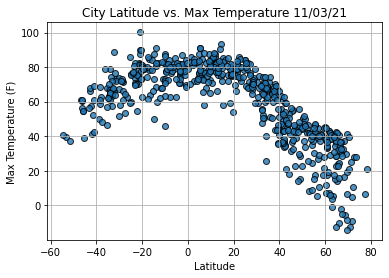

In [9]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(city_data_df["Latitude"],
            city_data_df["Maximum Temperature"],
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
#plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

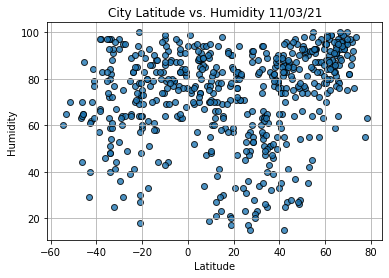

In [10]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(city_data_df["Latitude"],
            city_data_df["Humidity"],
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
#plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

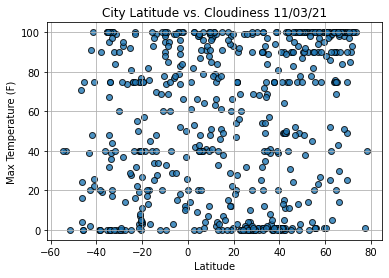

In [11]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(city_data_df["Latitude"],
            city_data_df["Cloud Cover"],
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
#plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

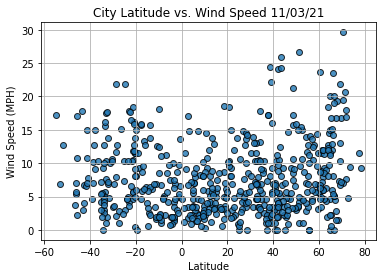

In [12]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(city_data_df["Latitude"],
            city_data_df["Wind"],
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (MPH)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
#plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

y = -0.44x + 67.17
The p-value is: 0.000


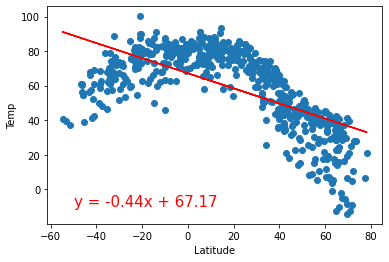

In [13]:
# Import Matplotlib.
from scipy.stats import linregress
import matplotlib.pyplot as plt

# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(city_data_df["Latitude"],city_data_df["Maximum Temperature"])
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")
regress_values = [(lat * slope + intercept) for lat in city_data_df["Latitude"]]

# Create a scatter plot of the x and y values.
plt.scatter(city_data_df["Latitude"],city_data_df["Maximum Temperature"])
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(city_data_df["Latitude"],regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (-50,-10), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

In [14]:
northern_hemi_df = city_data_df.loc[(city_data_df["Latitude"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Latitude"] < 0)]
northern_hemi_df

,City,Country,Date,Latitude,Longitude,Weather,Maximum Temperature,Humidity,Cloud Cover,Wind
0,kochi,IN,2021-11-04 05:35:10,9.9399,76.2602,overcast clouds,84.18,79,99,3.53
1,kapaa,US,2021-11-04 05:30:52,22.0752,-159.3190,moderate rain,80.58,83,90,3.00
3,nalut,LY,2021-11-04 05:36:12,30.3333,10.8500,overcast clouds,71.10,23,100,11.59
5,baruun-urt,MN,2021-11-04 05:36:12,46.6806,113.2792,broken clouds,45.32,37,52,14.63
8,upernavik,GL,2021-11-04 05:31:05,72.7868,-56.1549,overcast clouds,28.11,76,100,4.74
...,...,...,...,...,...,...,...,...,...,...
560,merritt island,US,2021-11-04 05:39:03,28.5392,-80.6720,clear sky,70.07,92,1,0.00
561,krasnyye baki,RU,2021-11-04 05:39:04,57.1310,45.1599,moderate rain,40.39,66,100,13.65
564,maravatio,MX,2021-11-04 05:39:05,19.9000,-100.4500,overcast clouds,53.78,59,99,2.53
566,aswan,EG,2021-11-04 05:31:40,24.0934,32.9070,clear sky,74.50,33,0,13.80


y = 0.3x + 61.87
The p-value is: 0.000


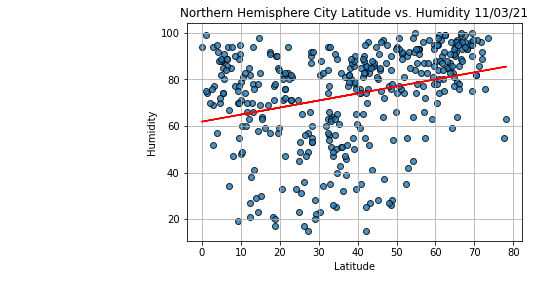

In [15]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(northern_hemi_df["Latitude"],
            northern_hemi_df["Humidity"],
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"Northern Hemisphere City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(northern_hemi_df["Latitude"],northern_hemi_df["Humidity"])
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")
regress_values = [(lat * slope + intercept) for lat in northern_hemi_df["Latitude"]]

# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(northern_hemi_df["Latitude"],regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (-50,-10), fontsize=15, color="red")

# Save the figure.
#plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

y = 0.32x + 79.48
The p-value is: 0.001


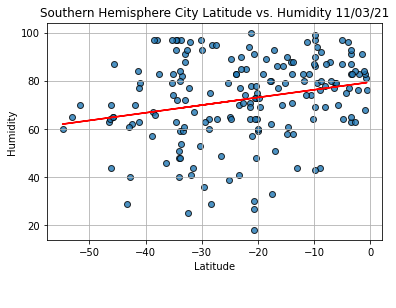

In [16]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(southern_hemi_df["Latitude"],
            southern_hemi_df["Humidity"],
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"Southern Hemisphere City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(southern_hemi_df["Latitude"],southern_hemi_df["Humidity"])
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")
regress_values = [(lat * slope + intercept) for lat in southern_hemi_df["Latitude"]]

# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(southern_hemi_df["Latitude"],regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (-50,-10), fontsize=15, color="red")

# Save the figure.
#plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

y = -1.02x + 92.14
The p-value is: 0.000


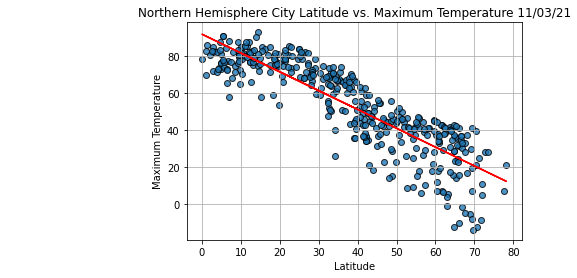

In [17]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(northern_hemi_df["Latitude"],
            northern_hemi_df["Maximum Temperature"],
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"Northern Hemisphere City Latitude vs. Maximum Temperature "+ time.strftime("%x"))
plt.ylabel("Maximum Temperature")
plt.xlabel("Latitude")
plt.grid(True)

# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(northern_hemi_df["Latitude"],northern_hemi_df["Maximum Temperature"])
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")
regress_values = [(lat * slope + intercept) for lat in northern_hemi_df["Latitude"]]

# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(northern_hemi_df["Latitude"],regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (-50,-10), fontsize=15, color="red")

# Save the figure.
#plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

y = 0.53x + 82.79
The p-value is: 0.000


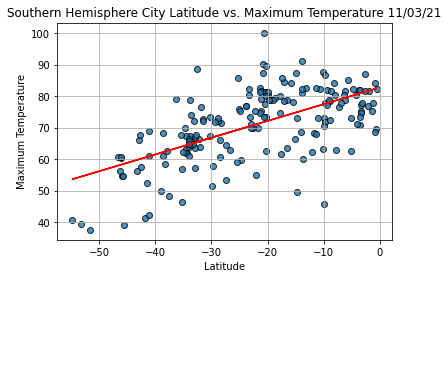

In [18]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(southern_hemi_df["Latitude"],
            southern_hemi_df["Maximum Temperature"],
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"Southern Hemisphere City Latitude vs. Maximum Temperature "+ time.strftime("%x"))
plt.ylabel("Maximum Temperature")
plt.xlabel("Latitude")
plt.grid(True)

# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(southern_hemi_df["Latitude"],southern_hemi_df["Maximum Temperature"])
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")
regress_values = [(lat * slope + intercept) for lat in southern_hemi_df["Latitude"]]

# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(southern_hemi_df["Latitude"],regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (-50,-10), fontsize=15, color="red")

# Save the figure.
#plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

y = 0.5x + 38.95
The p-value is: 0.000


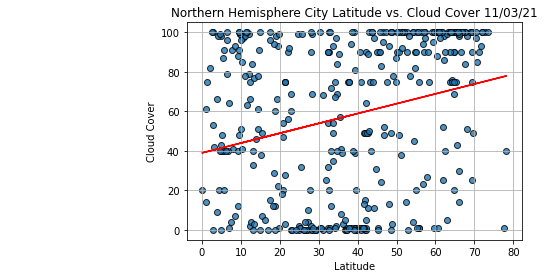

In [19]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(northern_hemi_df["Latitude"],
            northern_hemi_df["Cloud Cover"],
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"Northern Hemisphere City Latitude vs. Cloud Cover "+ time.strftime("%x"))
plt.ylabel("Cloud Cover")
plt.xlabel("Latitude")
plt.grid(True)

# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(northern_hemi_df["Latitude"],northern_hemi_df["Cloud Cover"])
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")
regress_values = [(lat * slope + intercept) for lat in northern_hemi_df["Latitude"]]

# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(northern_hemi_df["Latitude"],regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (-50,-10), fontsize=15, color="red")

# Save the figure.
#plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

y = 0.61x + 64.16
The p-value is: 0.003


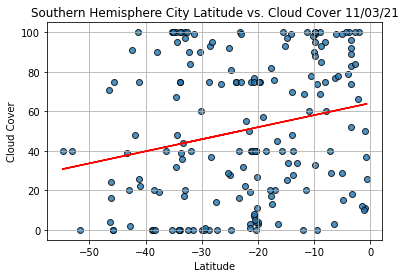

In [20]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(southern_hemi_df["Latitude"],
            southern_hemi_df["Cloud Cover"],
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"Southern Hemisphere City Latitude vs. Cloud Cover "+ time.strftime("%x"))
plt.ylabel("Cloud Cover")
plt.xlabel("Latitude")
plt.grid(True)

# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(southern_hemi_df["Latitude"],southern_hemi_df["Cloud Cover"])
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")
regress_values = [(lat * slope + intercept) for lat in southern_hemi_df["Latitude"]]

# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(southern_hemi_df["Latitude"],regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (-50,-10), fontsize=15, color="red")

# Save the figure.
#plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

In [1]:
city_data_df.to_csv('WeatherPy_Database.csv')

NameError: name 'city_data_df' is not defined